In [142]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [143]:
# Please fill in your names here
NAME_STUDENT_1 = "Bram van der Pol"
NAME_STUDENT_2 = "Joris van der Heijden"

In [144]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"



1.1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

The first column of figures shows the histograms of each column of the data in X. 
The second column shows the relationship between y and x. 

*Is there anything that stands out? Is there something that you think might require special treatment?*

The dataset containts non real numbers, so the data set must first be pre-processed to visualize it. In order the scatterplot and histogram for the relevant features the NaN value were removed.
Beside the NaN the data the figures that do not show a clear distrubution are: 1, 8, 10 and 11. 

,Team,League,Year,RA,...,RankPlayoffs,G,OOBP,OSLG
count,1232.00,1232.0,1232.00,1232.00,...,244.00,1232.00,420.00,420.00
mean,15.67,0.5,1988.96,715.08,...,1.72,3.92,0.33,0.42
std,9.72,0.5,14.82,93.08,...,1.10,0.62,0.02,0.03
min,0.00,0.0,1962.00,472.00,...,0.00,0.00,0.29,0.35
25%,7.00,0.0,1976.75,649.75,...,1.00,4.00,0.32,0.40
50%,16.00,0.5,1989.00,709.00,...,2.00,4.00,0.33,0.42
75%,23.00,1.0,2002.00,774.25,...,3.00,4.00,0.34,0.44
max,38.00,1.0,2012.00,1103.00,...,4.00,7.00,0.38,0.50


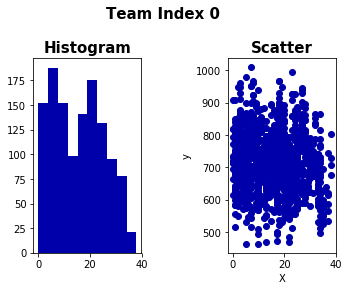

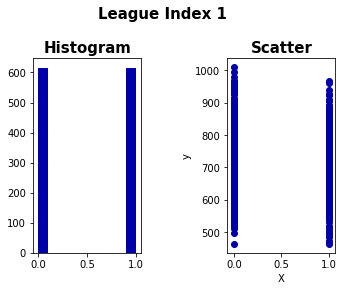

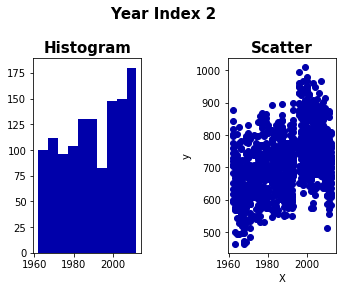

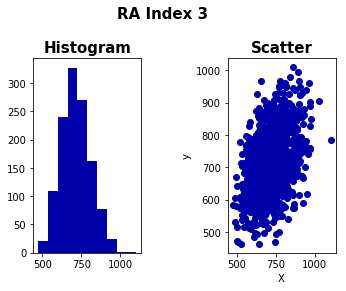

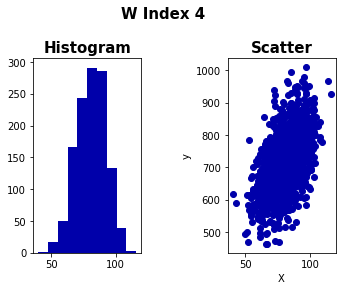

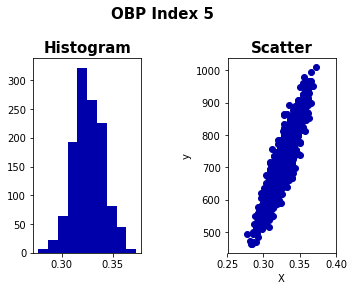

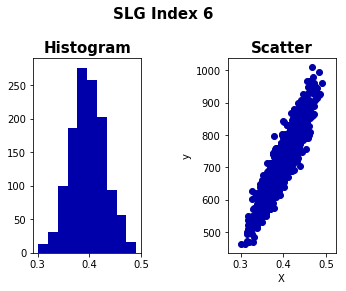

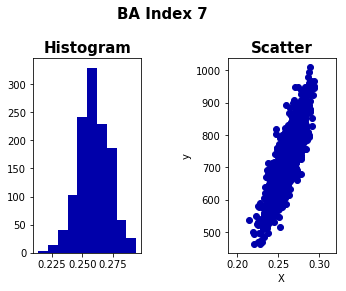

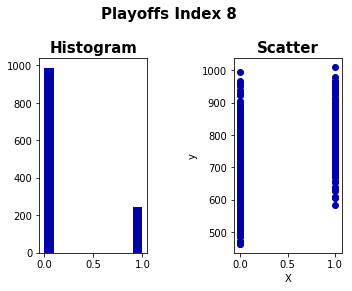

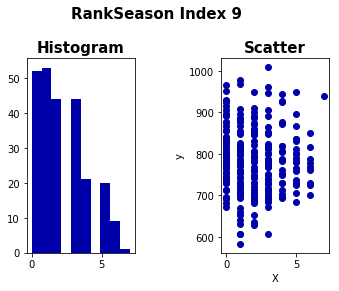

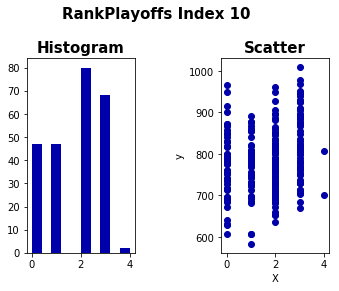

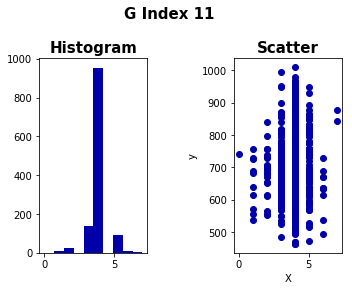

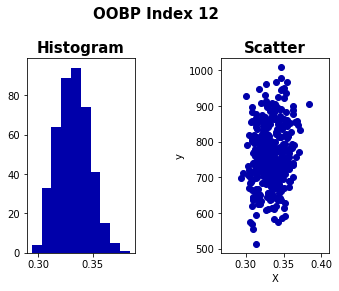

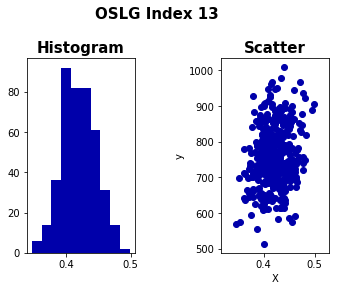

In [145]:
#moneyball 1
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe.describe()

import matplotlib

#n, bins, patches = ax.hist(X, num_bins, normed=1)

moneyball = oml.datasets.get_dataset(41021); # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True);
# Describe the data with pandas, just to get an overview

def printBallFrame():
    ballframe = pd.DataFrame(X, columns=attribute_names);
    ballframe.describe();
    return


import matplotlib;
#n, bins, patches = ax.hist(X, num_bins, normed=1)

def printHistoAndScatter():
    for index in range(len(X.T)):
        #if (index < 8):
        #print(index)
        column=X[:,index]
        Filtered_column1=column[~np.isnan(column)]

        Filtered_column2 = [np.nan if np.isnan(x) else x for x in column]

        fig1 = plt.figure(); #Generate new figure
        matplotlib.pyplot.subplot(1,2,1)
        matplotlib.pyplot.hist(Filtered_column1)
        matplotlib.pyplot.title('Histogram',fontweight='bold',fontsize=15)


        matplotlib.pyplot.subplot(1,2,2)
        matplotlib.pyplot.scatter(Filtered_column2,y)
        matplotlib.pyplot.title('Scatter',fontweight='bold',fontsize=15)
        matplotlib.pyplot.xlabel('X')
        matplotlib.pyplot.ylabel('y')

        matplotlib.pyplot.suptitle(attribute_names[index]+" Index "+str(index) ,fontweight='bold',fontsize=15)
        matplotlib.pyplot.subplots_adjust(left=0.2,wspace=0.8,top=0.8)
    return
        
printBallFrame()
printHistoAndScatter()


2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the $R^2$ score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.
- Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.

All features which have missing data were removed from the featureset before any further analysis. This means 4 features are removed completely and 10 features are considered for model generation. We chose to remove the data instead of filling in missing values because we were not sure which strategy to use for filling the blanks, and we assumed that 10 features would still be enough to obtain sufficiently good models.

Without scaling, LinearRegression returns the best score at 0.92 and an r2 of 0.95. The other regression algorithms return worse, but still acceptable scores, with one exception: KNN yields a score of 0.00 and an r2 score of only 0.2. Most likely there is an error in how the KNN algorithm is used here, but we were unable to pinpoint the issue.

Using StandardScaler has no effect on the LinearRegression scores, but all other algorithms have significantly higher scores compared to their counterparts where scaling was not used. Ridge now matches the scores of LinearRegression, and Lasso comes close as well losing by 0.01 point in the r2 score. ElasticNet scores are also improved, but the scores are not as high as the other three algorithms. The KNN score improves sleightly but is still a lot lower then is to be expected.


In [156]:

#assignment 1.2
 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, Lasso, ElasticNet
from sklearn.datasets import make_blobs, make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X_lessfeatures = X[:,~np.isnan(X).any(axis=0)] #removed all features that contain NaN's

#df = pd.DataFrame(np.zeros((4,4)), columns=['score', 'r2', 'score_scaled', 'r2_scaled'])
#print(df);

def printScore(regression, X_local, y_local):

    scores = cross_val_score(regression, X_local, y_local, cv=10)
    #print(scores)
    y_pred = cross_val_predict(regression, X_local, y_local, cv=10)
    r2= r2_score(y_local, y_pred) 
    #print(r2)
    print(regression)
    print("score: {:.2f}".format(scores.mean()))  
    print("r2: {:.2f}".format(r2))  

    
    return

def doregressions():
    #print(X.shape)
    #print(X_lessfeatures.shape)
    print("unscaled regression scores")
        
    lr = LinearRegression()
    printScore(lr, X_lessfeatures, y)

    ridge = Ridge()
    printScore(ridge, X_lessfeatures, y)

    lasso = Lasso()
    printScore(lasso, X_lessfeatures, y)

    knn = KNeighborsClassifier() 
    printScore(knn, X_lessfeatures, y)
    
    regr = ElasticNet()     
    printScore(regr, X_lessfeatures, y)
    return

doregressions()


def doregressionsWithScaler():
    print("StandardScaler scaled regression scores")

    scaler = StandardScaler()
    scaledData = scaler.fit_transform(X_lessfeatures)
        
    lr = LinearRegression()
    printScore(lr, scaledData, y);

    ridge = Ridge()
    printScore(ridge, scaledData, y);

    lasso = Lasso()
    printScore(lasso, scaledData, y);

    knn = KNeighborsClassifier()  
    printScore(knn, scaledData, y);
    
    regr = ElasticNet()      
    printScore(regr, scaledData, y);
    return

doregressionsWithScaler()

#printLR(lr)

 


unscaled regression scores
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
score: 0.92
r2: 0.95
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
score: 0.84
r2: 0.89
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
score: 0.80
r2: 0.86


c:\users\bramv\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\bramv\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
score: 0.00
r2: 0.20
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
score: 0.80
r2: 0.86
StandardScaler scaled regression scores
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
score: 0.92
r2: 0.95
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
score: 0.92
r2: 0.95
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
score: 0.92
r2: 0.94


c:\users\bramv\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\bramv\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
score: 0.01
r2: 0.63
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
score: 0.87
r2: 0.90


3 .  Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

For ElasticNet, the highest scores are obtained with alpha=100, the highest tested value for alpha, and a low L1 ratio of 0 to 0.3. Higher scores might be obtained by trying to increase alpha further. As seen in assignment 1.2, using a scaler may also lead to higher scores

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])
Best params:
{'alpha': 0.005, 'l1_ratio': 1}

Best cross-validation score: 0.95
Test-set score: 0.94
plotting heatmap


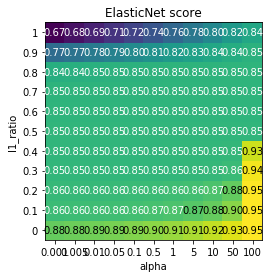

In [135]:
#assignment 1.3
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, Lasso, ElasticNet
from sklearn.datasets import make_blobs, make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X_lessfeatures, y, test_size=0.25)

def optimizeAlpha(regression, param_grid):
    '''
    pipe = pipeline.make_pipeline(
    StandardScaler(),
    regression)
    '''    
    

    # Note: I had to use n_jobs=1. (n_jobs=-1 stalls on my machine)
    grid = GridSearchCV(regression, param_grid=param_grid, cv=10, n_jobs=1)    
    print(regression.get_params().keys())
    
    grid.fit(X_train, y_train)

    print("Best params:\n{}\n".format(grid.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
    
    # convert to Dataframe
    results = pd.DataFrame(grid.cv_results_)
    print(results.keys())
   
    # Show the first 5 rows
    display(results.head())
    '''       
    testscores = np.array(results.mean_test_score).reshape(1, 11)
    trainscores = np.array(results.mean_train_score).reshape(1, 11)
    # plot the mean cross-validation scores
    mglearn.tools.heatmap(testscores, xlabel='alpha', xticklabels=param_grid['alpha'], ylabel='train score', yticklabels='', cmap="viridis");
    plt.show() 
    mglearn.tools.heatmap(trainscores, xlabel='alpha', xticklabels=param_grid['alpha'], ylabel='test score', yticklabels='', cmap="viridis");
    plt.show() 
    '''   
    '''
    plt.rcParams['lines.linewidth'] = 2
    plt.semilogy(param_grid, testscores, label="Training data")
    plt.semilogy(param_grid, trainscores, label="Test data")
    plt.legend();
    plt.show() 
    '''
    print("plotting heatmap")
    scores = np.array(results.mean_test_score).reshape(11, 11)
    # plot the mean cross-validation scores
    mglearn.tools.heatmap(scores, xlabel='alpha', xticklabels=param_grid['alpha'],
                      ylabel='l1_ratio', yticklabels=param_grid['l1_ratio'], cmap="viridis");
    plt.show() 

    return

def optimizeRidgeAndPlotHeatmap(regression, param_grid):

    grid = GridSearchCV(regression, param_grid=param_grid, cv=10, n_jobs=1)    
    print(regression.get_params().keys())    
    grid.fit(X_train, y_train)

    print("Best params:\n{}\n".format(grid.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
    
    # convert to Dataframe
    results = pd.DataFrame(grid.cv_results_)

    print("plotting heatmap")
    scores = np.array(results.mean_test_score).reshape(11, 11)
    
    # plot the mean cross-validation scores
    mglearn.tools.heatmap(scores, xlabel='alpha', xticklabels=param_grid['alpha'],
                      ylabel='l1_ratio', yticklabels=param_grid['l1_ratio'], cmap="viridis");
    plt.title("ElasticNet score")
    #plt.plot(10,10)
    #plt.figure(figsize=(1,1))
    plt.rcParams["figure.figsize"] = (10,5)
    plt.show() 
    return

#optimizeAlpha(LinearRegression(), 'alpha') #does not have alpha parameter
#optimizeAlpha(Ridge(), {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}) #with pipeline: 'ridge__alpha'
#optimizeAlpha(Lasso(), {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}) 
#optimizeAlpha(KNeighborsClassifier(), 'alpha') #does not have alpha parameter

optimizeRidgeAndPlotHeatmap(ElasticNet(), {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
                             'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}, )






4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

## Nepalese character recognition (5 points, 1+2+2)
The [Devnagari-Script dataset](https://www.openml.org/d/40923) contains 92,000 images (32x32 pixels) of 46 characters from Devanagari script. Your goal is to learn to recognize the right letter given the image.

In [136]:
devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed

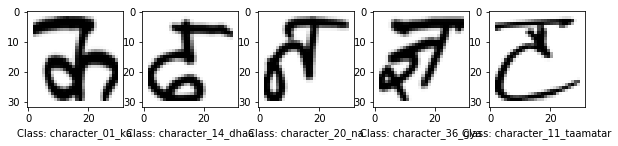

In [137]:
from random import randint
# Take some random examples, reshape to a 32x32 image and plot
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,90000)
    axes[i].imshow(X[n].reshape(32, 32), cmap=plt.cm.gray_r)
    axes[i].set_xlabel("Class: %s" % (classes[y[n]]))
plt.show();

1. Evaluate k-Nearest Neighbors, Logistic Regression and RandomForests with their default settings.
    - Take a stratified 10% subsample of the data.
    - Use the default train-test split and predictive accuracy. Is predictive accuracy a good scoring measure for this problem?
    - Try to build the same models on increasingly large samples of the dataset (e.g. 10%, 20%,...). Plot the training time and the predictive performance for each. Stop when the training time becomes prohibitively large (this will be different for different models). 

2 . Optimize the value for the number of neighbors $k$ (keep $k$ < 50) and the number of trees (keep $n\_estimators$ < 100) on the stratified 10% subsample.
- Use 10-fold crossvalidation and plot $k$ and $n\_estimators$ against the predictive accuracy. Which value of $k$, $n\_estimators$ should you pick?

3 . For the RandomForest, optimize both $n\_estimators$ and $max\_features$ at the same time on the entire dataset.
- Use a nested cross-validation and a random search over the possible values, and measure the accuracy. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal performance you find?
- Hint: choose a nested cross-validation that is feasible. Don't use too many folds in the outer loop.
- Repeat the grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow ACC$ with ACC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

## 3. Understanding Ensembles (5 points (3+2))
Do a deeper analysis of how RandomForests and Gradient Boosting reduce their prediction error. We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). When high-energy particles hit the atmosphere, they produce chain reactions of other particles called 'showers', and you need to detect whether these are caused by gamma rays or cosmic rays.

In [138]:
# Get the data
magic_data = oml.datasets.get_dataset(1120) # Download MAGIC Telescope data
X, y = magic_data.get_data(target=magic_data.default_target_attribute);

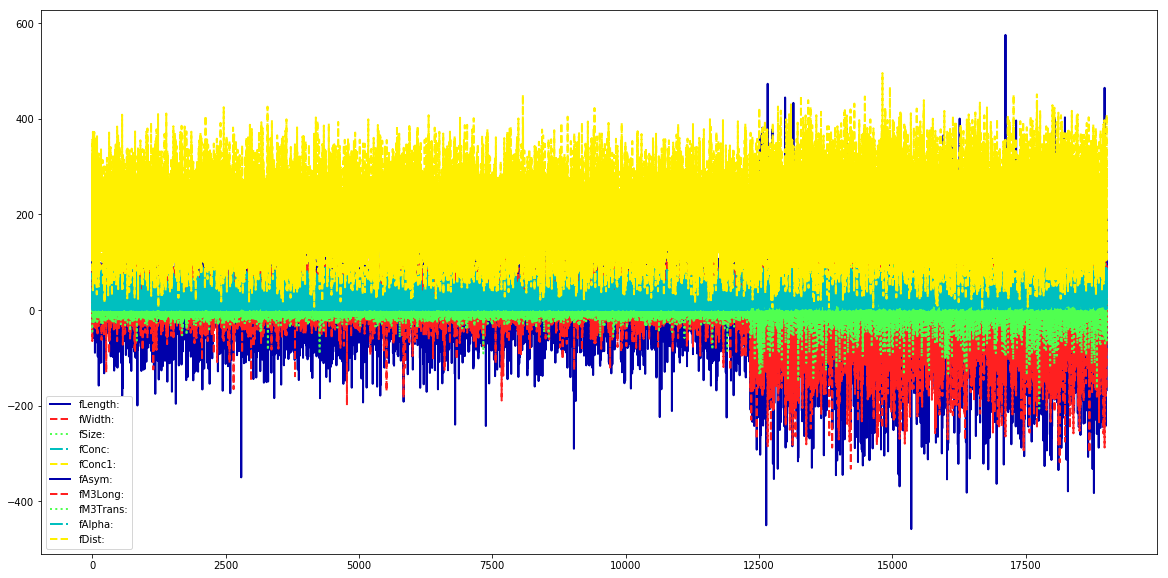

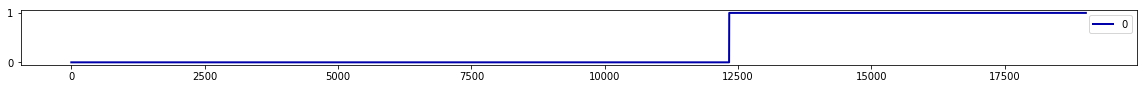

In [139]:
# Quick visualization
X, y, attribute_names = magic_data.get_data(target=magic_data.default_target_attribute, return_attribute_names=True)
magic = pd.DataFrame(X, columns=attribute_names)
magic.plot(figsize=(20,10))
# Also plot the target: 1 = gamma, 0 = background
pd.DataFrame(y).plot(figsize=(20,1));

1 . Do a bias-variance analysis of both algorithms. For each, vary the number of trees on a log scale from 1 to 1024, and plot the bias error (squared), variance, and total error (in one plot per algorithm). Interpret the results. Which error is highest for small ensembles, and which reduced most by each algorithm as you use a larger ensemble? When are both algorithms under- or overfitting? Provide a detailed explanation of why random forests and gradient boosting behave this way.
- See lecture 3 for an example on how to do the bias-variance decomposition
- To save time, you can use a 10% stratified subsample in your initial experiments, but show the plots for the full dataset in your report.

2 . A _validation curve_ can help you understand when a model starts under- or overfitting. It plots both training and test set error as you change certain characteristics of your model, e.g. one or more hyperparameters. Build validation curves for gradient boosting, evaluated using AUROC, by varying the number of iterations between 1 and 500. In addition, use at least two values for the learning rate (e.g. 0.1 and 1), and tree depth (e.g. 1 and 4). This will yield at least 4 curves. Interpret the results and provide a clear explanation for the results. When is the model over- or underfitting? Discuss the effect of the different combinations learning rate and tree depth and provide a clear explanation.
- While scikit-learn has a `validation_curve` function, we'll use a modified version (below) that provides a lot more detail and can be used to study more than one hyperparameter. You can use a default train-test split.

In [140]:
# Plots validation curves for every classifier in clfs. 
# Also indicates the optimal result by a vertical line
# Uses 1-AUROC, so lower is better
def validation_curve(clfs, X_test, y_test, X_train, y_train):
    for n,clf in enumerate(clfs):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.2f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        
    plt.legend(loc='best')